# Imports 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error
import itertools 

In [2]:
df = pd.read_csv(r'C:\Users\vasan\OneDrive\Documents\python_files\Training_camp\perrin-freres-monthly-champagne.csv')
df.tail()



,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [3]:
df.dropna(inplace= True)

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format= '%Y-%m' )
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [5]:
df =df.set_index(df.Month)

df.head()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
Month,,
1964-01-01,1964-01-01,2815.0
1964-02-01,1964-02-01,2672.0
1964-03-01,1964-03-01,2755.0
1964-04-01,1964-04-01,2721.0
1964-05-01,1964-05-01,2946.0


In [6]:
df = df.drop(columns=['Month'])
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [7]:
df =df.rename(columns= {"Perrin Freres monthly champagne sales millions ?64-?72": "Sales"})
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


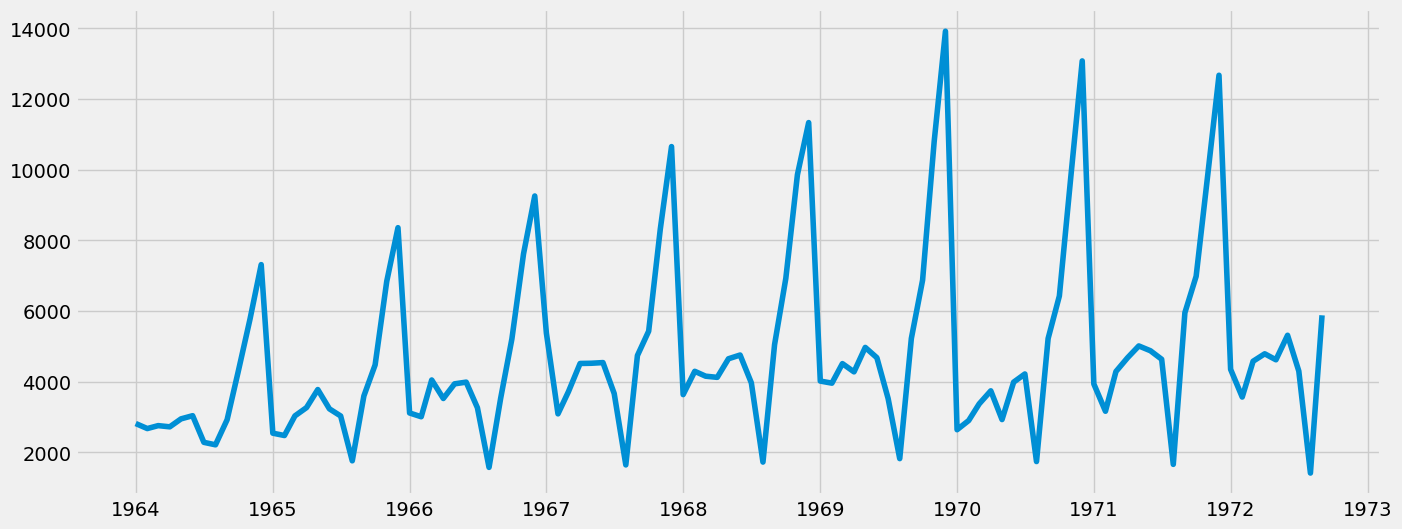

In [8]:
plt.figure(figsize = (15,6) , dpi= 100)
plt.plot(df)

# Train test split 

In [9]:
train = df.loc[df.index<= '1971-01-01']
test = df.loc[df.index >= '1971-01-01']

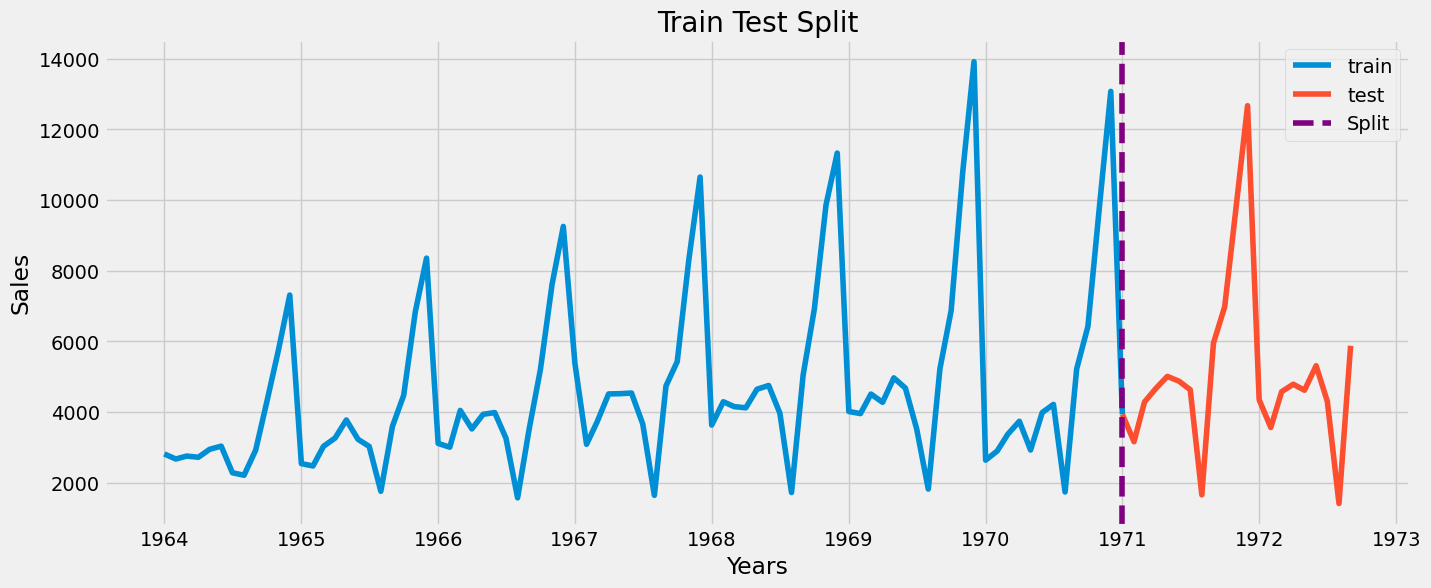

In [10]:
plt.figure(figsize=(15,6))
plt.plot(train)
plt.plot(test)
plt.title("Train Test Split")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.axvline(pd.Timestamp('1971-01-01'),ls = '--', color = 'purple')
plt.legend(['train' , 'test', 'Split'])


# Decomposition 

In [11]:
decomp_results = seasonal_decompose(train)


<Figure size 3000x1200 with 0 Axes>

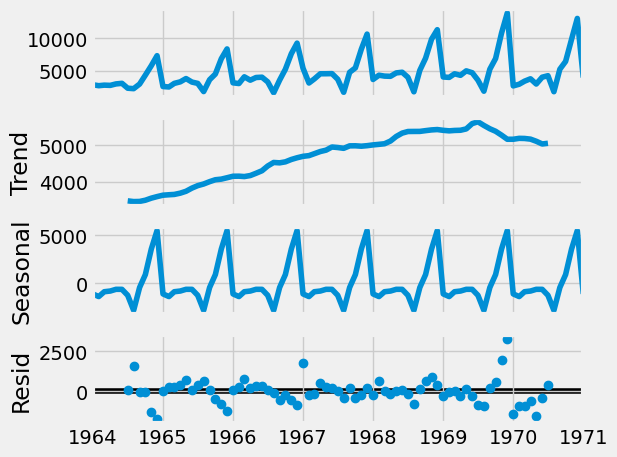

In [12]:
plt.figure(figsize=(15,6), dpi= 200)
decomp_results.plot()

plt.show()

# Diffrencing or integration 

In [13]:
test_results = adfuller(train)
test_results

(-2.2011037037495993,
 0.20584511996449495,
 11,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 1177.3297071030865)

In [14]:
train1 = train.diff()
train1.dropna(inplace=True)
train1


,Sales
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0
...,...
1970-09-01,3483.0
1970-10-01,1203.0
1970-11-01,3418.0


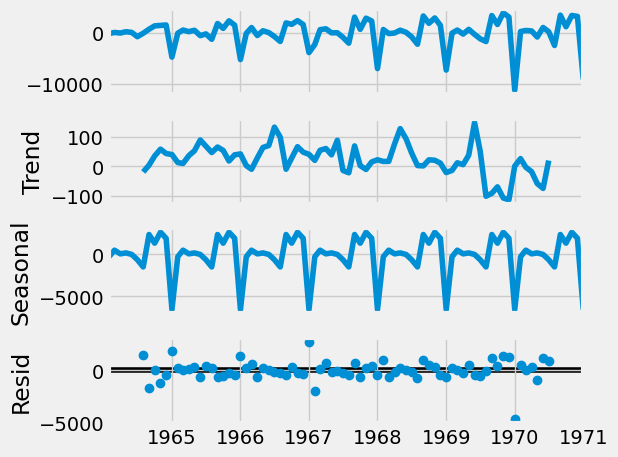

In [15]:
seasonal_decompose(train1).plot()
plt.show()

In [16]:
test_results1 = adfuller(train1)
test_results1

(-23.879553834493674,
 0.0,
 10,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 1167.4658753642118)

# ACF and PACF plots 

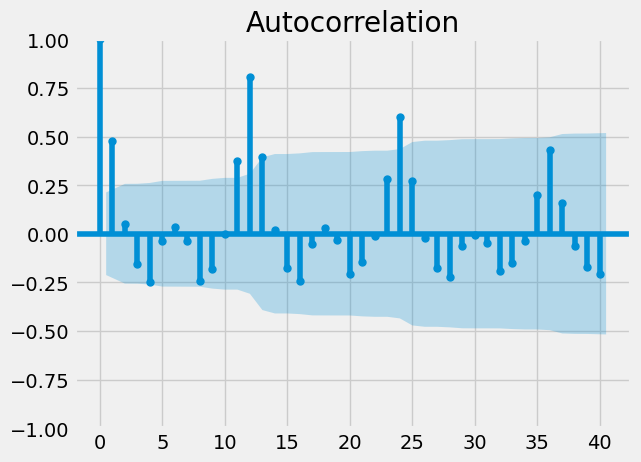

In [17]:
acf = plot_acf(train , lags= 40)

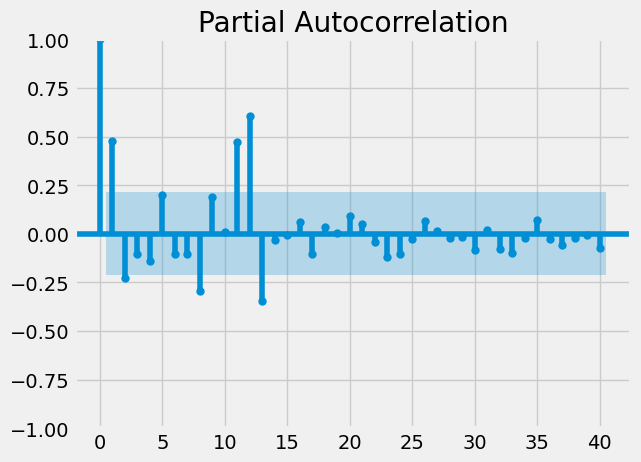

In [18]:
pacf = plot_pacf(train , lags = 40)

# Arima model 

In [19]:
model = ARIMA(train.Sales, order=(1,1,2))
model_fit = model.fit()
preds = model_fit.predict(start='1971-01-01', end= '1972-09-01')

C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   85
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -766.260
Date:                Fri, 21 Jun 2024   AIC                           1540.521
Time:                        14:04:34   BIC                           1550.244
Sample:                    01-01-1964   HQIC                          1544.429
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1746      0.184     -0.949      0.343      -0.535       0.186
ma.L1         -0.1642      0.138     -1.186      0.236      -0.436       0.107
ma.L2         -0.7406      0.107     -6.941      0.000      -0.950      -0.531
sigma2      4.798e+06   6.94e+05      6.913      0.000    3.44e+06    6.16e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.86   Prob(JB):                         0.61
Heteroskedasticity (H):               4.53   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

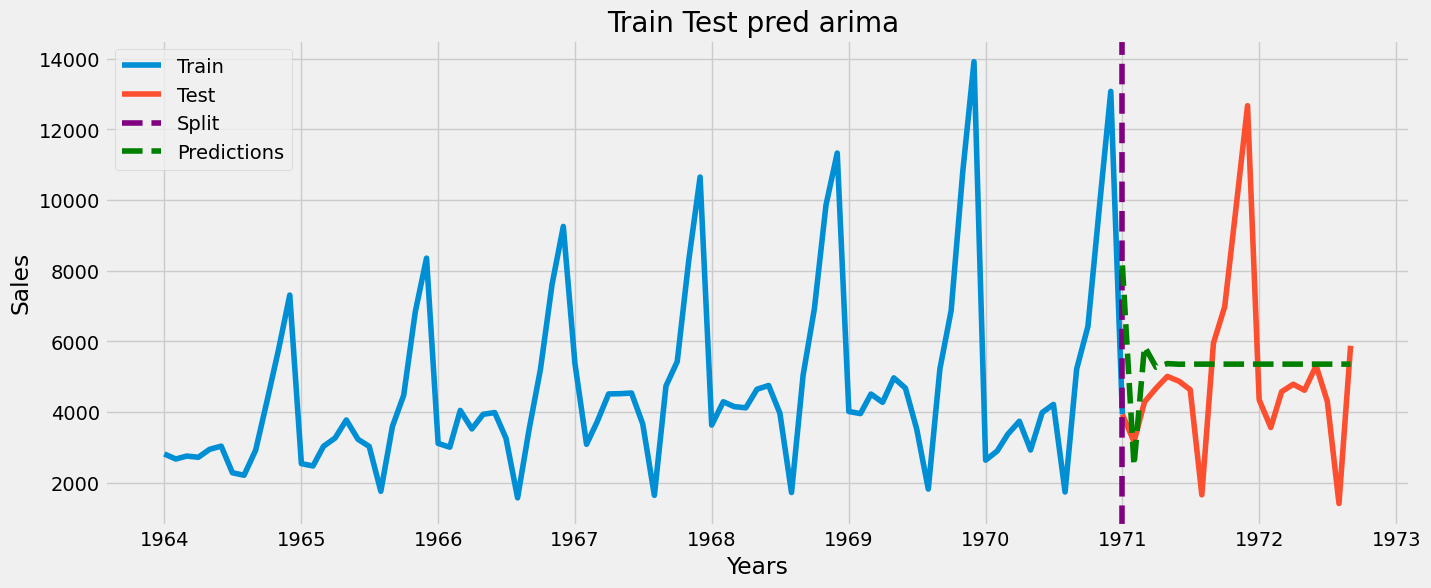

In [21]:
plt.figure(figsize=(15,6))
plt.plot(train)
plt.plot(test)
plt.title("Train Test pred arima ")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.axvline(pd.Timestamp('1971-01-01'),ls = '--', color = 'purple')
plt.plot(preds , ls = '--' , color = 'green')
plt.legend(['Train' , 'Test', 'Split', 'Predictions'])


# Sarima


In [22]:
model = SARIMAX(train.Sales, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
preds = model_fit.predict(start='1971-01-01', end= '1972-09-01')

C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   85
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -582.606
Date:                            Fri, 21 Jun 2024   AIC                           1175.212
Time:                                    14:04:35   BIC                           1186.595
Sample:                                01-01-1964   HQIC                          1179.744
                                     - 01-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2377      0.099      2.390      0.017       0.043       0.433
ma.L1         -0.9246      0.064    -14.558      0.000      -1.049      -0.800
ar.S.L12      -0.6164      0.357     -1.727      0.084      -1.316       0.083
ma.S.L12       0.4281      0.379      1.129      0.259      -0.315       1.171
sigma2       5.65e+05   7.88e+04      7.173      0.000    4.11e+05    7.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.53   Prob(JB):                         0.11
Heteroskedasticity (H):               2.12   Skew:                            -0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

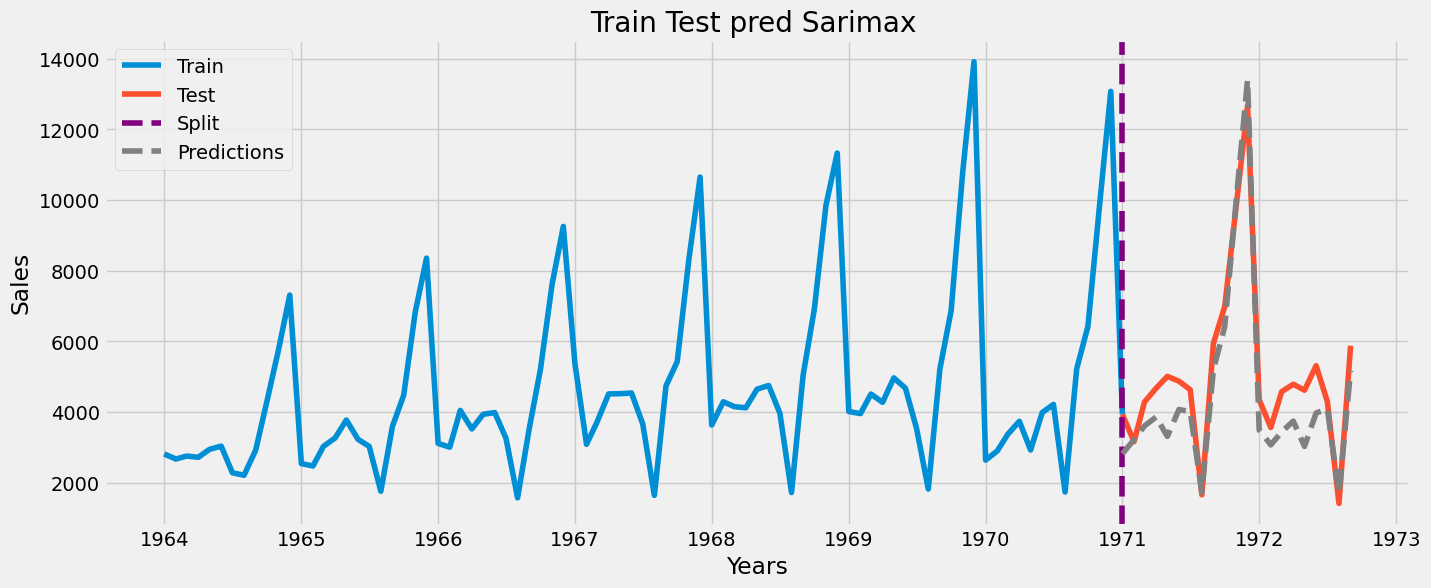

In [24]:
plt.figure(figsize=(15,6))
plt.plot(train)
plt.plot(test)
plt.title("Train Test pred Sarimax ")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.axvline(pd.Timestamp('1971-01-01'),ls = '--', color = 'purple')
plt.plot(preds , ls = '--' , color = 'grey')
plt.legend(['Train' , 'Test', 'Split', 'Predictions'])


# Accuracy score 

In [25]:
MAPE = mean_absolute_percentage_error(test , preds)
MSE = mean_squared_error(test, preds)
MAE = mean_absolute_error(test, preds)
RMSE = np.sqrt(MSE)

In [27]:
print(f"MAE: {MAE:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAPE: {MAPE:.2f}%")

MAE: 747.31
MSE: 761734.97
RMSE: 872.77
MAPE: 0.16%


# Tuned Arima


In [57]:
p = q = list(range(0,10))
d= 1

In [58]:
pdq = list(itertools.product(p,[d],q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 1, 9),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (2, 1, 9),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (3, 1, 9),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (4, 1, 8),
 (4, 1, 9),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (5, 1, 8),
 (5, 1, 9),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (6, 1, 8),
 (6, 1, 9),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7),
 (7, 1, 8),
 (7, 1, 9),
 (8, 1, 0),
 (8, 1, 1),
 (8, 1, 2),
 (8,

In [ ]:
best_mae = np.Infinity
for param in pdq:
    model = ARIMA(train , order= param)
    model_fit = model.fit()
    preds = model_fit.predict(start='1971-01-01', end= '1972-09-01')
    mae = mean_absolute_percentage_error(preds, test)
    if mae < best_mae:
        best_mae = mae
        best_param = param

print(f'Best parm = {best_param}')
print(f"Best mae= {best_mae :.2f}")
    